In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from flowability_data_upload.local.generate_datasets.loaddata import load_data
import flowability_data_upload.local.preprocess as preprocess
from flowability_data_upload.local.generate_datasets import VirtualPowderMixing as powderMixer
from flowability_data_upload.local.generate_datasets import TrainAndTestSetGenerator as testSetGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load normal data
data = load_data()

Sync Info:	
Last Sync Time (Server Time): 2021-06-09 16:15:44.605398	
Upload Time of Last Added File: 2020-12-07 20:44:26.554000
Data Sync Status:  True
__________________________________________________________________
Loading Local Data...


In [4]:
#Clean and preprocess data
data = preprocess.clean(data)
data = preprocess.remove_duplicate_powders(data)

Da
88721 / 1495749 (0.05931543327122398)
Number of zeros: 0


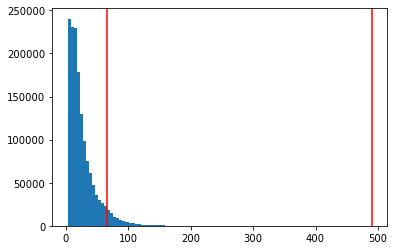

Dp
101103 / 1495749 (0.06759356014946358)
Number of zeros: 0


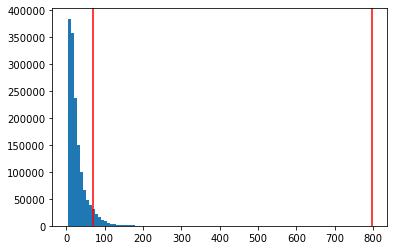

FWidth
80112 / 1495749 (0.05355978844044021)
Number of zeros: 0


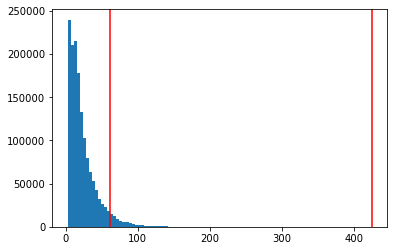

FLength
106871 / 1495749 (0.07144982212924762)
Number of zeros: 0


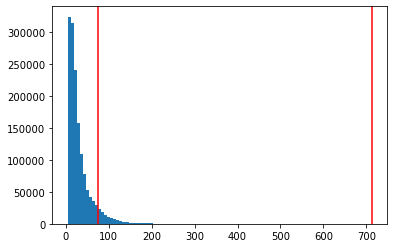

ELength
106559 / 1495749 (0.07124123098193615)
Number of zeros: 0


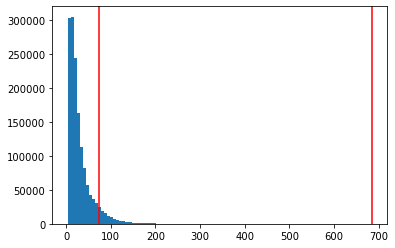

EWidth
78949 / 1495749 (0.052782251567609274)
Number of zeros: 0


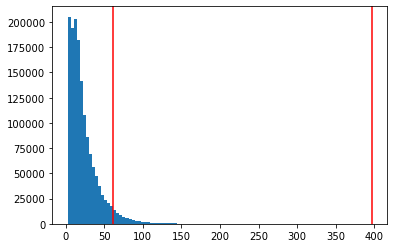

Volume
224025 / 1495749 (0.14977446082196946)
Number of zeros: 0


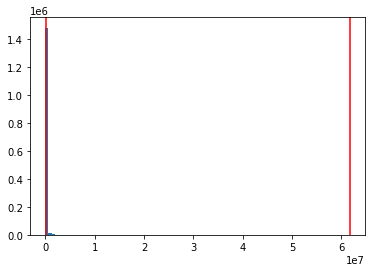

Area
175548 / 1495749 (0.11736461130844814)
Number of zeros: 0


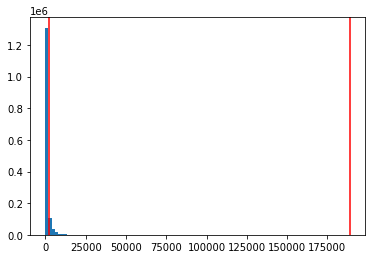

Perimeter
101103 / 1495749 (0.06759356014946358)
Number of zeros: 0


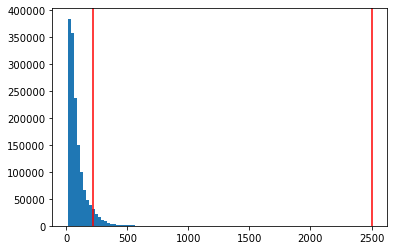

CHull  Area
178495 / 1495749 (0.11933486166462422)
Number of zeros: 0


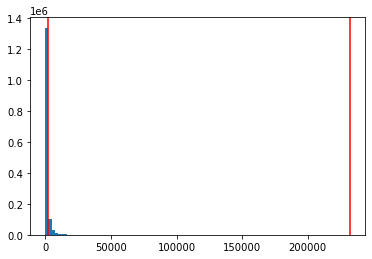

CHull Perimeter
97206 / 1495749 (0.06498817649217883)
Number of zeros: 0


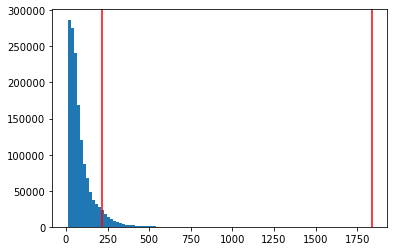

Sphericity
95936 / 1495749 (0.06413910355280197)
Number of zeros: 0


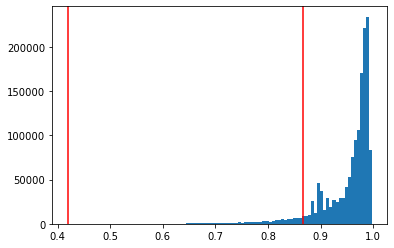

Compactness
25959 / 1495749 (0.01735518459313695)
Number of zeros: 0


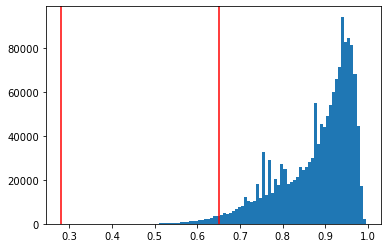

Roundness
10567 / 1495749 (0.007064687992437234)
Number of zeros: 0


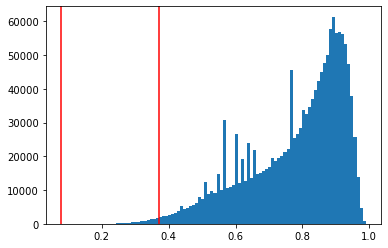

Ellipse Ratio
54938 / 1495749 (0.0367294245224299)
Number of zeros: 0


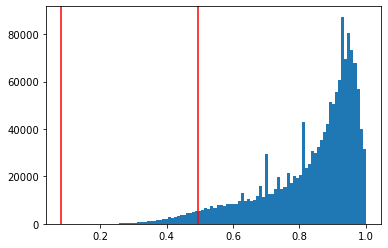

Circularity
90406 / 1495749 (0.0604419591789799)
Number of zeros: 0


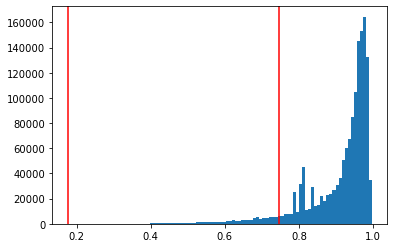

Solidity
152912 / 1495749 (0.10223105614645238)
Number of zeros: 0


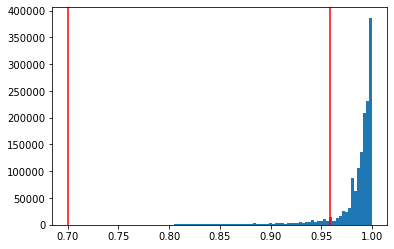

Concavity
152913 / 1495749 (0.10223172470782196)
Number of zeros: 149476


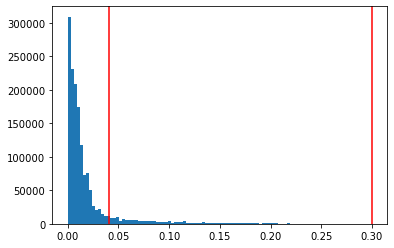

Convexity
168411 / 1495749 (0.11259308881369802)
Number of zeros: 0


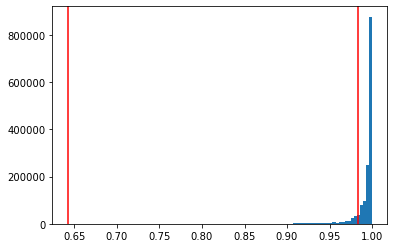

Extent
93304 / 1495749 (0.06237945002804615)
Number of zeros: 0


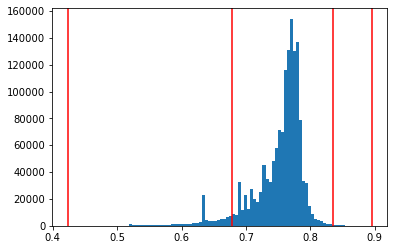

Transparency
39 / 1495749 (2.6073893413935093e-05)
Number of zeros: 100204


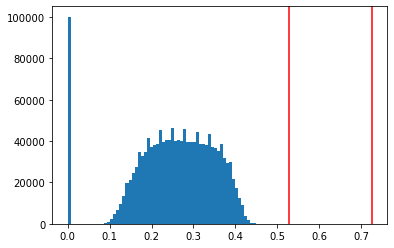

Curvature
20356 / 1495749 (0.013609235239334942)
Number of zeros: 1475393


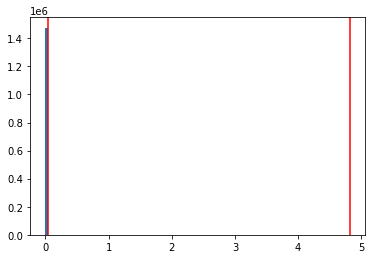

Surface Area
175548 / 1495749 (0.11736461130844814)
Number of zeros: 0


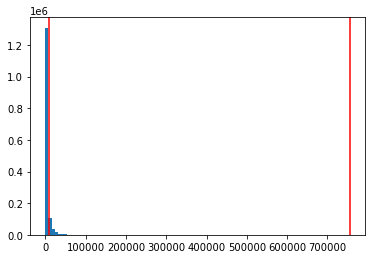

L/W Ratio
81243 / 1495749 (0.054315931349444325)
Number of zeros: 0


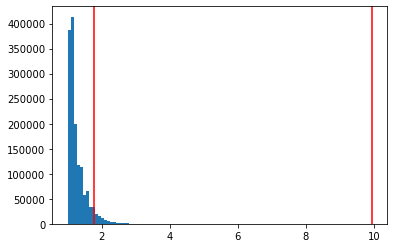

W/L Aspect Ratio
18571 / 1495749 (0.01241585319462022)
Number of zeros: 0


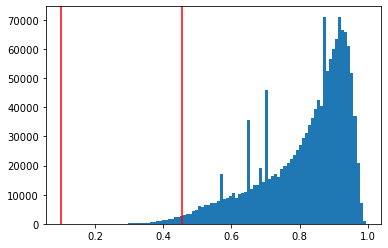

CHull Surface Area
178495 / 1495749 (0.11933486166462422)
Number of zeros: 0


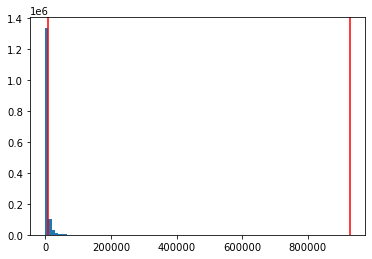

Ellipticity
131534 / 1495749 (0.08793855118739842)
Number of zeros: 0


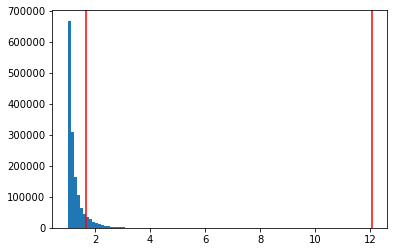

Fiber Length
119300 / 1495749 (0.07975937139185786)
Number of zeros: 1376449


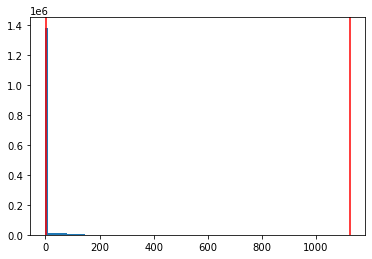

Fiber Width
119044 / 1495749 (0.07958821968124331)
Number of zeros: 1376705


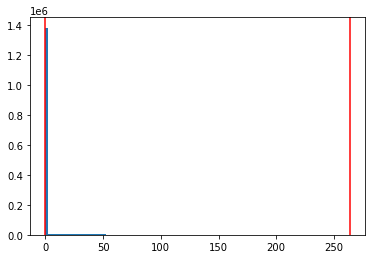

In [20]:
# Prints out the value distribution for each column for all powders across the board
identification_columns = ['sample_id', 'name', 'flowability']
feature_columns = [col for col in data.columns if col not in identification_columns]
for col in feature_columns:
    print(col)
    plt.hist(data[col].tolist(), bins=100)
    quartiles = data[col].quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75]-quartiles[0.25]
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    lower_outliers = data.loc[data[col] < q1 - 1.5*IQR][col]
    higher_outliers = data.loc[data[col] > q3 + 1.5*IQR][col]
    outliers = len(higher_outliers)+ len(lower_outliers)
    total_len = len(data[col])
    zeros = data.loc[data[col] == 0.0]
    if len(higher_outliers) > 0:
        min_outlier = min(higher_outliers)
        max_outlier = max(higher_outliers)
        #print(min_outlier)
        #print(max_outlier)
        plt.axvline(x=min_outlier,color="red")
        plt.axvline(x=max_outlier,color="red")
    if len(lower_outliers) > 0:
        min_outlier = min(lower_outliers)
        max_outlier = max(lower_outliers)
        #print(min_outlier)
        #print(max_outlier)
        plt.axvline(x=min_outlier,color="red")
        plt.axvline(x=max_outlier,color="red")
    print(str(outliers) + " / " + str(total_len) + " (" + str(outliers*1.0 / total_len) + ")")
    print("Number of zeros: " + str(len(zeros)))
    #plt.boxplot(data[col].tolist())
    plt.show()
    #plt.savefig(col + "_outliers.csv")
    plt.close()

In [14]:
# Builds a massive subplot with the column histogram of every column for each powder individually
identification_columns = ['sample_id', 'name', 'flowability']
feature_columns = [col for col in data.columns if col not in identification_columns]
sample_ids = data['sample_id'].unique()

fig, axes = plt.subplots(len(feature_columns), len(sample_ids), figsize=(360, 214))
for index1 in range(0, len(sample_ids)):
    sample_id = sample_ids[index1]
    name = powder.iloc[0]["name"]
    powder = data[data.sample_id == sample_id]
    print(name)
    print("-----------------------------------")
    for index2 in range(0, len(feature_columns)):
        col = feature_columns[index2]
        print(col)
        axes[index2, index1].hist(powder[col].tolist(), bins=10)
        axes[index2, index1].set_title(col + " of " + name)
        axes[index2, index1].set(xlabel=col, ylabel='Frequency')
        quartiles = powder[col].quantile([0.25, 0.5, 0.75])
        IQR = quartiles[0.75]-quartiles[0.25]
        q1 = quartiles[0.25]
        q3 = quartiles[0.75]
        lower_outliers = powder.loc[data[col] < q1 - 1.5*IQR][col]
        higher_outliers = powder.loc[data[col] > q3 + 1.5*IQR][col]
        outliers = len(higher_outliers)+ len(lower_outliers)
        total_len = len(powder[col])
        zeros = powder.loc[powder[col] == 0.0]
        if len(higher_outliers) > 0:
            min_outlier = min(higher_outliers)
            max_outlier = max(higher_outliers)
            print(min_outlier)
            print(max_outlier)
            axes[index2, index1].axvline(x=min_outlier,color="red")
            axes[index2, index1].axvline(x=max_outlier,color="red")
        if len(lower_outliers) > 0:
            min_outlier = min(lower_outliers)
            max_outlier = max(lower_outliers)
            print(min_outlier)
            print(max_outlier)
            axes[index2, index1].axvline(x=min_outlier,color="red")
            axes[index2, index1].axvline(x=max_outlier,color="red")
        print(str(outliers) + " / " + str(total_len) + " (" + str(outliers*1.0 / total_len) + ")")
        print("Number of zeros: " + str(len(zeros)))
        #plt.boxplot(data[col].tolist())
        #plt.savefig(col + "_outliers.csv")
    print("--------------------------------")


# ax[0, 1].hist(x_data2)
# ax[1, 0].hist(x_data1)
# plt.close()
# ax[1, 1].hist(x_data2)
# plt.show()
plt.savefig("BigPlots10Bins.png")
plt.close()


S14B3_4420_Excel
-----------------------------------
Da
49.985
130.42
587 / 84476 (0.006948719162839149)
Number of zeros: 0
Dp
51.218999999999994
137.901
984 / 84476 (0.011648278801079597)
Number of zeros: 0
FWidth
47.787
127.571
364 / 84476 (0.004308916141862778)
Number of zeros: 0
FLength
53.754
157.384
1387 / 84476 (0.016418864529570528)
Number of zeros: 0
ELength
53.026
161.629
1406 / 84476 (0.0166437804820304)
Number of zeros: 0
EWidth
47.568000000000005
126.204
357 / 84476 (0.004226052369903878)
Number of zeros: 0
Volume
21001.347
1161540.824
10228 / 84476 (0.12107580851366069)
Number of zeros: 0
Area
1174.7910000000002
13359.198999999999
6575 / 84476 (0.07783275723282353)
Number of zeros: 0
Perimeter
160.909
433.228
984 / 84476 (0.011648278801079597)
Number of zeros: 0
CHull  Area
1187.295
13632.988000000001
6629 / 84476 (0.07847199204507789)
Number of zeros: 0
CHull Perimeter
159.852
419.914
857 / 84476 (0.01014489322411099)
Number of zeros: 0
Sphericity
0.52
0.9259999999999999

In [21]:
# Builds a subplot of all the column distributions for all powders combined
identification_columns = ['sample_id', 'name', 'flowability']
feature_columns = [col for col in data.columns if col not in identification_columns]

fig, axes = plt.subplots(5, 6, figsize=(60, 40))
for index1 in range(0, 5):
    for index2 in range(0, 6):
        index = (index1*6) + index2
        if index < len(feature_columns):
            col = feature_columns[index]
            print(col)
            axes[index1, index2].hist(data[col].tolist(), bins=100)
            axes[index1, index2].set_title(col + " Distribution Across Particles")
            axes[index1, index2].set(xlabel=col, ylabel='Frequency')
            quartiles = data[col].quantile([0.25, 0.5, 0.75])
            IQR = quartiles[0.75]-quartiles[0.25]
            q1 = quartiles[0.25]
            q3 = quartiles[0.75]
            lower_outliers = data.loc[data[col] < q1 - 1.5*IQR][col]
            higher_outliers = data.loc[data[col] > q3 + 1.5*IQR][col]
            outliers = len(higher_outliers)+ len(lower_outliers)
            total_len = len(data[col])
            zeros = data.loc[data[col] == 0.0]
            if len(higher_outliers) > 0:
                min_outlier = min(higher_outliers)
                max_outlier = max(higher_outliers)
                #print(min_outlier)
                #print(max_outlier)
                axes[index1, index2].axvline(x=min_outlier,color="red")
                axes[index1, index2].axvline(x=max_outlier,color="red")
            if len(lower_outliers) > 0:
                min_outlier = min(lower_outliers)
                max_outlier = max(lower_outliers)
                #print(min_outlier)
                #print(max_outlier)
                axes[index1, index2].axvline(x=min_outlier,color="red")
                axes[index1, index2].axvline(x=max_outlier,color="red")
            print(str(outliers) + " / " + str(total_len) + " (" + str(outliers*1.0 / total_len) + ")")
            print("Number of zeros: " + str(len(zeros)))
    print("--------------------------------")

plt.savefig("DistributionAcrossAllPowders.png")
plt.close()

Da
88721 / 1495749 (0.05931543327122398)
Number of zeros: 0
Dp
101103 / 1495749 (0.06759356014946358)
Number of zeros: 0
FWidth
80112 / 1495749 (0.05355978844044021)
Number of zeros: 0
FLength
106871 / 1495749 (0.07144982212924762)
Number of zeros: 0
ELength
106559 / 1495749 (0.07124123098193615)
Number of zeros: 0
EWidth
78949 / 1495749 (0.052782251567609274)
Number of zeros: 0
--------------------------------
Volume
224025 / 1495749 (0.14977446082196946)
Number of zeros: 0
Area
175548 / 1495749 (0.11736461130844814)
Number of zeros: 0
Perimeter
101103 / 1495749 (0.06759356014946358)
Number of zeros: 0
CHull  Area
178495 / 1495749 (0.11933486166462422)
Number of zeros: 0
CHull Perimeter
97206 / 1495749 (0.06498817649217883)
Number of zeros: 0
Sphericity
95936 / 1495749 (0.06413910355280197)
Number of zeros: 0
--------------------------------
Compactness
25959 / 1495749 (0.01735518459313695)
Number of zeros: 0
Roundness
10567 / 1495749 (0.007064687992437234)
Number of zeros: 0
Ellipse 